<a href="https://colab.research.google.com/github/2303A51692/ADM_Lab/blob/main/lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df=pd.read_csv('/content/Salary_Data.csv')

In [6]:
df=pd.DataFrame(df)

In [7]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [9]:
X = df[['Years of Experience']].values
y = df['Salary'].values

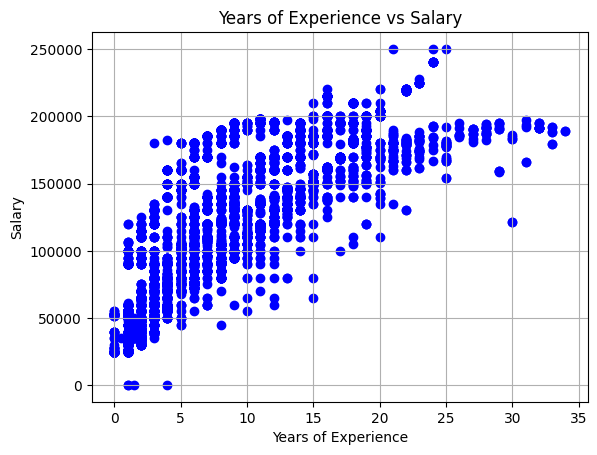

In [10]:
plt.scatter(X, y, color='blue')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [29]:
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [30]:
df.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6699,False,False,False,False,False,False
6700,False,False,False,False,False,False
6701,False,False,False,False,False,False
6702,False,False,False,False,False,False


In [31]:
df.isna().sum()

,0
Age,0
Gender,0
Education Level,1
Job Title,0
Years of Experience,0
Salary,0


In [32]:
nan_indices = df['Salary'].isna()

In [33]:
df = df[~nan_indices]

In [34]:
mean_salary = df['Salary'].mean()
df['Salary'].fillna(mean_salary, inplace=True)

<ipython-input-34-94f6933a657e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(mean_salary, inplace=True)


In [35]:
df.isna().sum()

,0
Age,0
Gender,0
Education Level,1
Job Title,0
Years of Experience,0
Salary,0


In [36]:
X = df[['Years of Experience']].values
y = df['Salary'].values

In [37]:
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [38]:
y_pred = model.predict(X_poly)

In [40]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [41]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 733280470.50
R² Score: 0.74


In [42]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

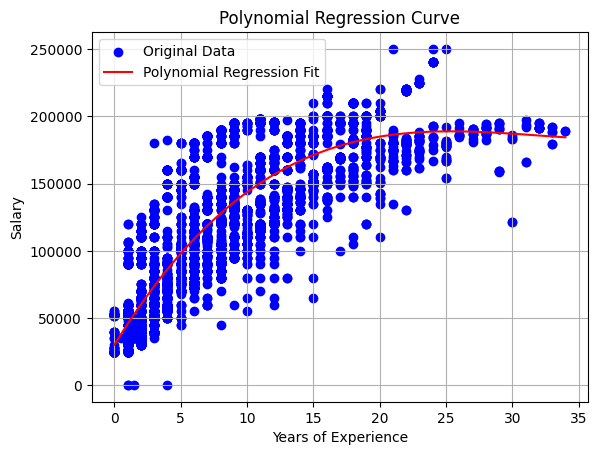

In [43]:
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Regression Fit')
plt.title('Polynomial Regression Curve')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()